In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd

In [18]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, func, inspect, text


In [20]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [25]:
data = inspect(engine)

In [26]:
data.get_columns('measurement')[2]


{'name': 'date',
 'type': TEXT(),
 'nullable': True,
 'default': None,
 'autoincrement': 'auto',
 'primary_key': 0}

# Exploratory Climate Analysis

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

precipitation_data = []

for row in session.query(Measurement).all():
        precipitation_data.append({
            "date": row.date,
            "precipitation": row.prcp
        })
        
df = pd.DataFrame.from_records(precipitation_data)

df['date_converted'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

max_date = df.date_converted.max()

df['flag'] = df['date_converted'].apply(lambda x: True if max_date - x <= timedelta(days=365) else False)

df.query('flag == True', inplace=True)

df.sort_values(by='date', ascending=True, inplace =True)

df = df[['date','precipitation']].groupby(['date']).agg({'precipitation': 'sum'}).reset_index()



# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

df

,date,precipitation
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32
5,2016-08-28,3.10
6,2016-08-29,1.46
7,2016-08-30,0.07
8,2016-08-31,3.18
9,2016-09-01,0.03


In [33]:
df.set_index("date").to_dict()


{'precipitation': {'2016-08-23': 2.71,
  '2016-08-24': 9.33,
  '2016-08-25': 0.5399999999999999,
  '2016-08-26': 0.1,
  '2016-08-27': 0.32,
  '2016-08-28': 3.0999999999999996,
  '2016-08-29': 1.46,
  '2016-08-30': 0.07,
  '2016-08-31': 3.1799999999999997,
  '2016-09-01': 0.03,
  '2016-09-02': 0.25,
  '2016-09-03': 1.2700000000000002,
  '2016-09-04': 1.3800000000000001,
  '2016-09-05': 0.33999999999999997,
  '2016-09-06': 1.2300000000000002,
  '2016-09-07': 2.0,
  '2016-09-08': 0.45999999999999996,
  '2016-09-09': 1.0699999999999998,
  '2016-09-10': 1.4,
  '2016-09-11': 1.25,
  '2016-09-12': 1.54,
  '2016-09-13': 2.71,
  '2016-09-14': 14.28,
  '2016-09-15': 4.96,
  '2016-09-16': 0.8200000000000001,
  '2016-09-17': 0.68,
  '2016-09-18': 0.53,
  '2016-09-19': 0.32,
  '2016-09-20': 1.03,
  '2016-09-21': 1.17,
  '2016-09-22': 1.44,
  '2016-09-23': 1.5699999999999998,
  '2016-09-24': 0.28,
  '2016-09-25': 0.09,
  '2016-09-26': 1.6700000000000002,
  '2016-09-27': 1.3599999999999999,
  '2016-0

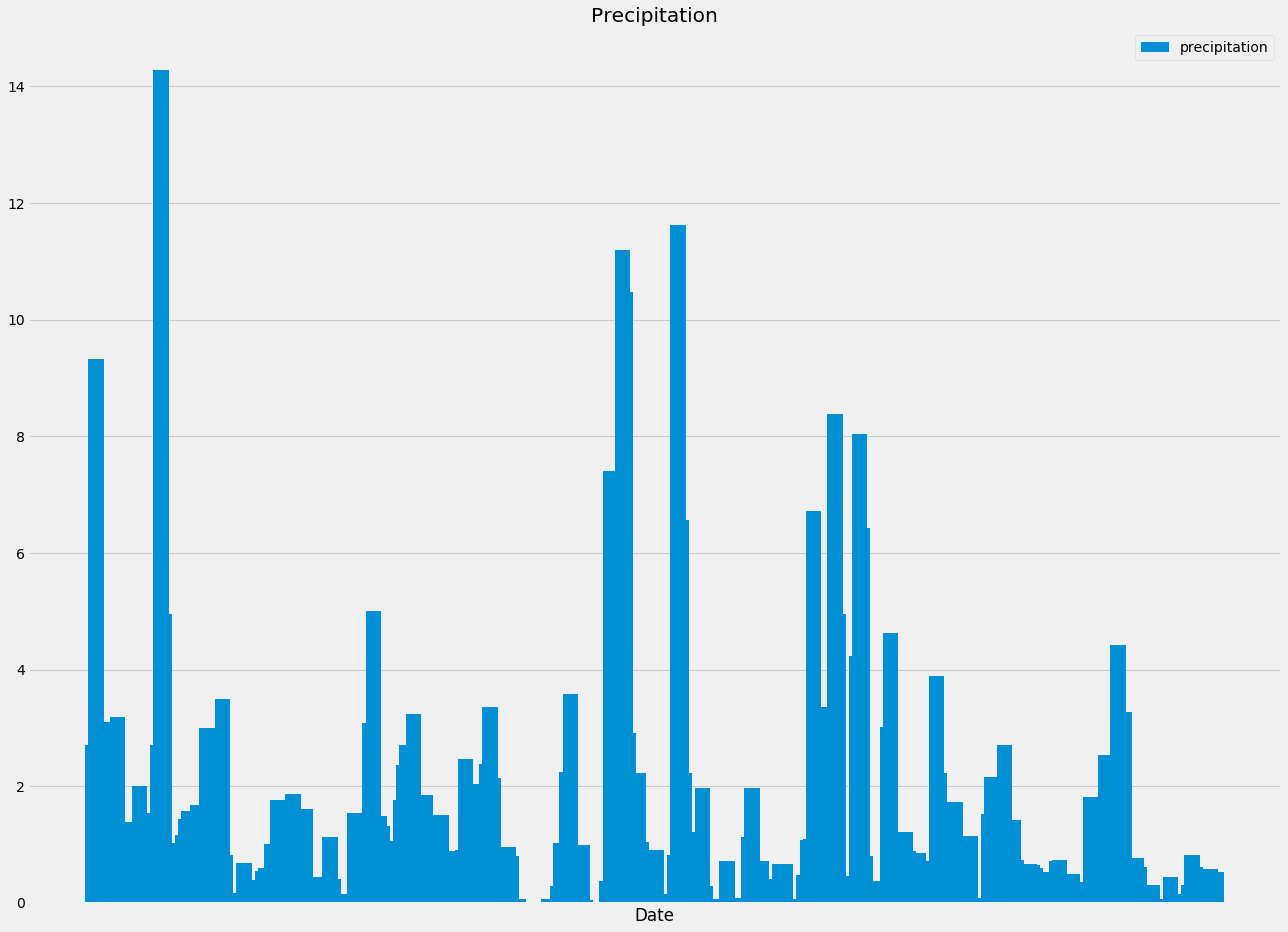

In [36]:
plt.figure(figsize=(20,15))
plt.bar(df['date'], df['precipitation'], width=5, label='precipitation')
plt.ylim(0,15)
plt.xlabel("Date")
plt.title('Precipitation')
plt.grid(True)
plt.xticks([])
plt.legend(loc="upper right")

![precipitation](Images/precipitation.png)

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


![describe](Images/describe.png)

In [40]:
# Design a query to show how many stations are available in this dataset?
sql = text('SELECT DISTINCT station FROM measurement')
stations = engine.execute(sql).fetchall()
names = [row for row in stations]
for station in stations:
    print(station)
stations = engine.execute("SELECT COUNT(DISTINCT station) FROM Station")
for station in stations:
    print(station[0])


('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)
9


In [41]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = engine.execute("SELECT station, count(*) as row_count \
    FROM measurement \
    GROUP BY station \
    ORDER BY row_count DESC")
for station in stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [42]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

stations = engine.execute("SELECT station, count(*) as observation_count, min(tobs) as min_temp, max(tobs) as max_temp, avg(tobs) as avg_temp FROM Measurement GROUP BY station ORDER BY observation_count DESC")
for station in stations:
    print(station)


('USC00519281', 2772, 54.0, 85.0, 71.66378066378067)
('USC00519397', 2724, 56.0, 87.0, 74.55323054331865)
('USC00513117', 2709, 59.0, 85.0, 72.68918420081211)
('USC00519523', 2669, 56.0, 85.0, 74.5436493068565)
('USC00516128', 2612, 58.0, 84.0, 70.91500765696784)
('USC00514830', 2202, 58.0, 85.0, 74.8732970027248)
('USC00511918', 1979, 53.0, 87.0, 71.61596766043456)
('USC00517948', 1372, 58.0, 87.0, 74.68440233236151)
('USC00518838', 511, 58.0, 83.0, 72.72407045009784)


In [48]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station = []

for row in session.query(Measurement).filter(Measurement.station == 'USC00519281').all():
        station.append({
            "date": row.date,
            "temperature": row.tobs
        })
df_stations = pd.DataFrame.from_records(station)

df_stations['datetime'] = pd.to_datetime(df_stations['date'], format='%Y-%m-%d')

max_date = df_stations.datetime.max()

df_stations['flag'] = df_stations['datetime'].apply(lambda x: True if max_date - x <= timedelta(days=365) else False) 

df_stations.query('flag == True', inplace=True)

df_stations.sort_values(by='date', ascending=True, inplace =True)

df_stations = df_stations[['date','temperature']].groupby(['date']).agg({'temperature': 'sum'}).reset_index()


df_stations





,date,temperature
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0
5,2016-08-23,77.0
6,2016-08-24,77.0
7,2016-08-25,80.0
8,2016-08-26,80.0
9,2016-08-27,75.0


Text(0.5,1,'Temperature Frequency')

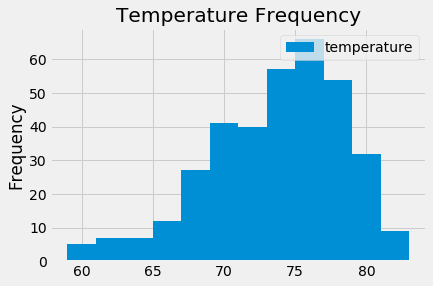

In [51]:
df_stations.hist(label='temperature', bins=12)
plt.legend(loc="upper right")
plt.ylabel("Frequency")
plt.title("Temperature Frequency")

![precipitation](Images/station-histogram.png)

In [52]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [53]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

temps = calc_temps('2016-02-28', '2017-03-05')

errorbar_min = temps[0][0]
errorbar_max = temps[0][2]
avg_temp = temps[0][1]

print(calc_temps('2016-02-28', '2017-03-05'))


[(59.0, 74.11674478057094, 84.0)]


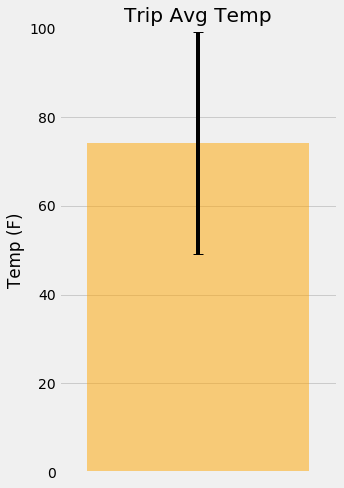

In [55]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=(5,7))
#ax.set_xticks(index)
#ax.set_xticklabels(df1.columns)
plt.bar(1,avg_temp, yerr=errorbar_max-errorbar_min, alpha=.5, color='orange', capsize=5)
plt.xlim(.5,1.5)
plt.ylim(0,100)
plt.grid(True)
plt.xticks([])
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()


In [56]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall = engine.execute("SELECT station.station, station.name, station.latitude, \
    station.longitude, station.elevation, sum(measurement.prcp) \
    as rainfall FROM station INNER JOIN measurement on station.station \
    = measurement.station WHERE measurement .date BETWEEN '2016-02-28' AND \
    '2017-03-05'GROUP BY station.station ORDER BY rainfall DESC")
for rain in rainfall:
    print(rain)


('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 173.84)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 89.39000000000003)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 62.55000000000002)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 40.01)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 32.29)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 22.129999999999995)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 6.17)


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


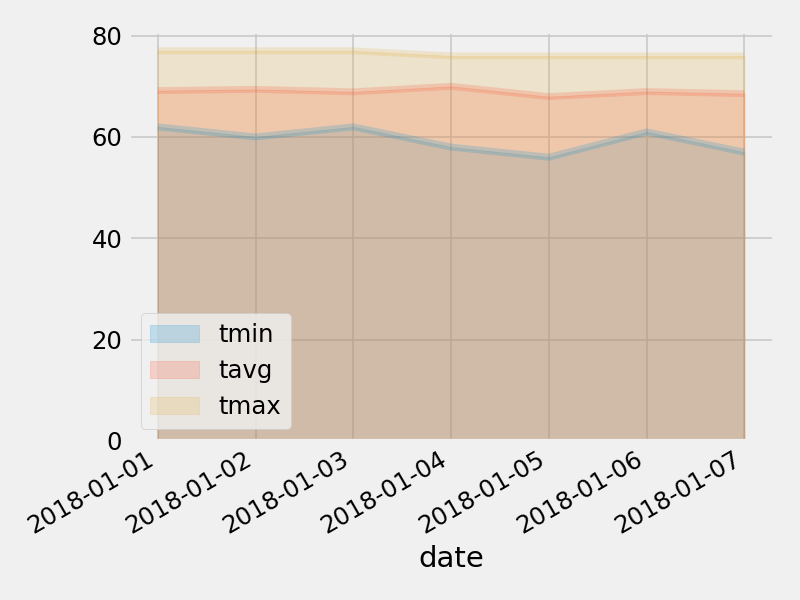

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
